<a href="https://colab.research.google.com/github/Yuzhou-Wang99/CS7643/blob/main/Simple_NN_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
# create a Model class that inherits nn.Module

class Model(nn.Module):
  def __init__(self, in_features = 4, H1=8,H2=9,out_features = 3):
    super().__init__()

    self.fc1 = nn.Linear(in_features,H1)
    self.fc2 = nn.Linear(H1,H2)
    self.out = nn.Linear(H2,out_features)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)

    x = self.fc2(x)
    x = F.relu(x)

    x = self.out(x)

    return x

In [36]:
torch.manual_seed(41)

#Create an instance of model
model = Model()

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [38]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [39]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
# change last column from strings ['setosa','versicolor','virginica'] to integers [0,1,2]
my_df['species'] = pd.Categorical(my_df['species']).codes
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
# Train Test split
X = my_df.drop('species', axis = 1)
y = my_df['species']

# convert it into numpy arrays
X = X.values
y = y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

#choose Adam Optimizer, learning rate (if error does not go down after a bunch of iterations, we might want to lower the lr)
Optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [43]:
# Train the model
# First, how many epoch?

epoch = 200
losses = []

for i in range(epoch):
  #forward pass
  y_pred = model.forward(X_train)

  #Measure the loss
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and loss:{loss}")

  #back-propogation
  Optimizer.zero_grad()
  loss.backward()
  Optimizer.step()

Epoch: 0 and loss:1.1251550912857056
Epoch: 10 and loss:1.0096259117126465
Epoch: 20 and loss:0.8157405853271484
Epoch: 30 and loss:0.585706353187561
Epoch: 40 and loss:0.3999636471271515
Epoch: 50 and loss:0.26768800616264343
Epoch: 60 and loss:0.17942361533641815
Epoch: 70 and loss:0.12151690572500229
Epoch: 80 and loss:0.0860118493437767
Epoch: 90 and loss:0.06520850956439972
Epoch: 100 and loss:0.05286576226353645
Epoch: 110 and loss:0.04508381709456444
Epoch: 120 and loss:0.03979949280619621
Epoch: 130 and loss:0.035970740020275116
Epoch: 140 and loss:0.03293721750378609
Epoch: 150 and loss:0.03041938506066799
Epoch: 160 and loss:0.026795217767357826
Epoch: 170 and loss:0.02338254824280739
Epoch: 180 and loss:0.020531881600618362
Epoch: 190 and loss:0.018495969474315643


Text(0.5, 0, 'epoch')

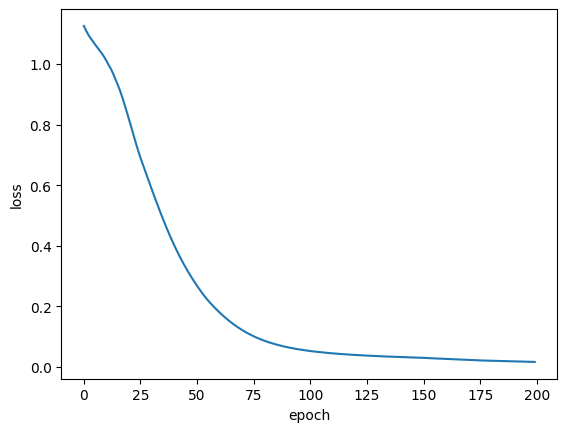

In [44]:
plt.plot(range(epoch),losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [47]:
#Evaluate Model on Test Data set
with torch.no_grad():#Basically turn off back-prop
   y_eval = model.forward(X_test)
   loss = criterion(y_eval,y_test)
loss

tensor(0.1816)

In [50]:
# see details of the prediction
correct_pred = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model.forward(data)

    if y_pred.argmax().item() == y_test[i]:
      correct_pred += 1

    print(f'{i+1:2}. {str(y_pred):25} \t{y_pred.argmax().item()} \t {y_test[i]}')

print(f'We got {correct_pred} correct predictions !')

 1. tensor([-7.1090,  3.8945,  9.0009]) 	2 	 2
 2. tensor([-9.7568,  1.8037, 15.7614]) 	2 	 2
 3. tensor([-10.9675,   2.8777,  16.6036]) 	2 	 2
 4. tensor([-3.7644,  8.0391, -1.2691]) 	1 	 1
 5. tensor([-9.0332,  3.5238, 12.6383]) 	2 	 2
 6. tensor([-1.8244,  8.6935, -5.3425]) 	1 	 1
 7. tensor([-6.8734,  4.9821,  7.3703]) 	2 	 2
 8. tensor([-3.6489,  8.2259, -1.6743]) 	1 	 1
 9. tensor([-7.9281,  4.2588,  9.9576]) 	2 	 2
10. tensor([-10.4298,   1.8741,  16.8126]) 	2 	 2
11. tensor([-6.4726,  5.1594,  6.5086]) 	2 	 2
12. tensor([ 12.4419,   2.4570, -21.9049]) 	0 	 0
13. tensor([ 11.4217,   2.2044, -19.9136]) 	0 	 0
14. tensor([-0.1940,  6.9626, -6.0924]) 	1 	 1
15. tensor([ 10.1568,   3.3059, -19.1088]) 	0 	 0
16. tensor([-5.9767,  5.7989,  4.9675]) 	1 	 2
17. tensor([ 11.2091,   2.5254, -19.9652]) 	0 	 0
18. tensor([-6.8898,  4.2924,  8.1948]) 	2 	 1
19. tensor([ 12.0366,   2.3664, -21.1260]) 	0 	 0
20. tensor([  9.6811,   2.7818, -17.7338]) 	0 	 0
21. tensor([-0.8226,  7.6358, -5.809